# Import Data and Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 14 to 939
Data columns (total 19 columns):
Type                      0 non-null float64
Time                      434 non-null object
Date                      434 non-null datetime64[ns]
Sample Note               363 non-null object
Noted Time                336 non-null object
Sample Time               434 non-null datetime64[ns]
Product                   434 non-null object
CompA                     44 non-null float64
PV                        434 non-null float64
CompF                     44 non-null float64
Unnamed: 10               0 non-null float64
Unnamed: 11               0 non-null float64
Time Start in Kiln        434 non-null datetime64[ns]
Kiln_Gas_Valve            434 non-null object
Kiln Gas Smooth           434 non-null float64
Kiln_Temp_Radia           434 non-null object
Kiln Temp Smooth          434 non-null float64
Kiln Rotation SPD-FDBK    434 non-null object
Kiln Rotation Smooth      434 non-null flo

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


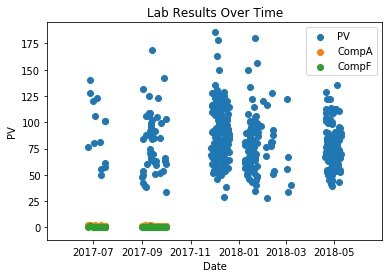

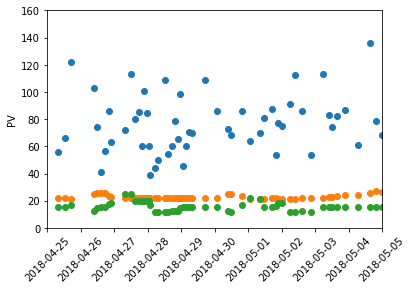

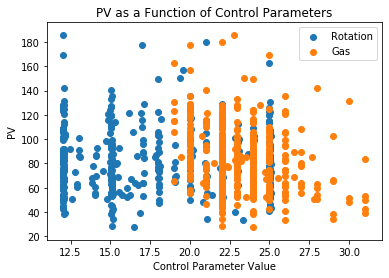

y=-0.086975x+(265.719859)


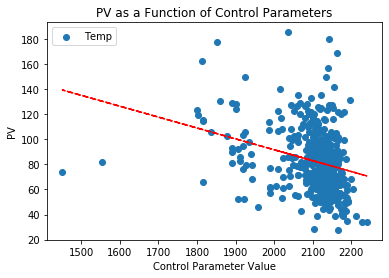

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


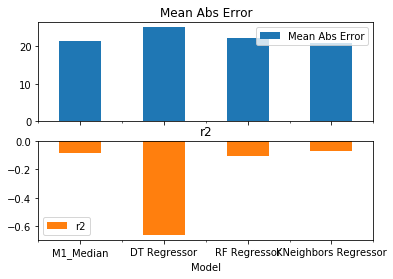

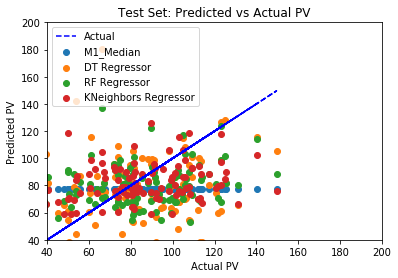

In [2]:
#get models for use
%run "Machine Learning - KD PV by Gas, Rot.ipynb"

# Lookup Charts 
As an intermediate step to implementing machine learning, charts can be used to determine one input parameter based on the other to obtain a target PV. 

(50, 120)

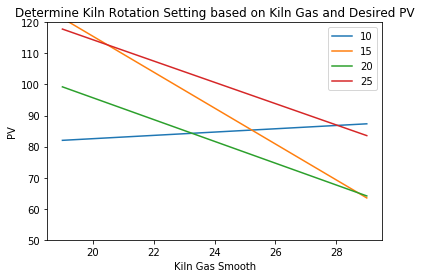

In [3]:
kiln_rot_isos=[10,15,20,25]

for i in kiln_rot_isos:
    kiln_gas_series=list(range(int(data[kiln_gas].min()),int(data[kiln_gas].max()),10))
    kiln_rot_series=[i]*len(kiln_gas_series)
    X_plot1=pd.DataFrame({kiln_rot:kiln_rot_series,kiln_gas:kiln_gas_series})

    y_plot1=M4_train.predict(X_plot1)
    plt.plot(X_plot1[kiln_gas],y_plot1)

plt.xlabel(kiln_gas)
plt.ylabel('PV')
plt.legend(kiln_rot_isos)
plt.title('Determine Kiln Rotation Setting based on Kiln Gas and Desired PV')

plt.ylim(50,120)
  


(50, 120)

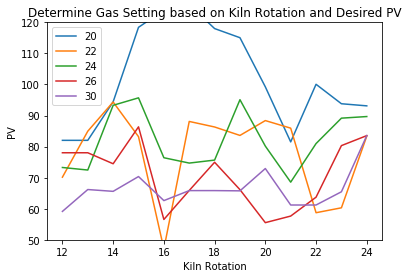

In [4]:
kiln_gas_isos=[20,22,24,26,30]

for i in kiln_gas_isos:
    kiln_rot_series=list(range(int(data[kiln_rot].min()),int(data[kiln_rot].max()),1))
    kiln_gas_series=[i]*len(kiln_rot_series)
    X_plot1=pd.DataFrame({kiln_rot:kiln_rot_series,kiln_gas:kiln_gas_series})

    y_plot1=M4_train.predict(X_plot1)
    plt.plot(X_plot1[kiln_rot],y_plot1)

plt.xlabel("Kiln Rotation")
plt.ylabel('PV')
plt.legend(kiln_gas_isos)
plt.title('Determine Gas Setting based on Kiln Rotation and Desired PV')
plt.ylim(50,120)
  

Different trend patterns are observed at different constant parameters. This could be due to a lack of data to really define certain zones. The indirect effect of other input parameters not used in the model can also impact the differences in trends if certain settings are used depending on those parameters. 